In [1]:

import numpy as np
import os
import pandas as pd
import datetime
import tempfile
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
df_reponses = pd.read_csv(r'C:\Users\gregh\OneDrive\Documents\ENSAE\StatApp\tt\df_reponses.csv')
df_text_prop = pd.read_csv(r'C:\Users\gregh\OneDrive\Documents\ENSAE\StatApp\tt\clust.csv')

In [23]:
df_reponses

,node_id,006F52E9102A8D3BE2FE5614F42BA989_0.0,006F52E9102A8D3BE2FE5614F42BA989_1.0,006F52E9102A8D3BE2FE5614F42BA989_nan,013D407166EC4FA56EB1E1F8CBE183B9_0.0,013D407166EC4FA56EB1E1F8CBE183B9_1.0,013D407166EC4FA56EB1E1F8CBE183B9_nan,02522A2B2726FB0A03BB19F2D8D9524D_0.0,02522A2B2726FB0A03BB19F2D8D9524D_1.0,02522A2B2726FB0A03BB19F2D8D9524D_nan,...,F7E6C85504CE6E82442C770F7C8606F0_nan,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan
0,2c90f5883f44af68013f564a1326558a,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,2c90f588404b48480140ce4d7d301013,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,2c90f5884109d2c401410c40ae942d95,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,2c90f5884109d2c401410c4434a433a6,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,ff808181717a658e017181c0a2022261,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
439,ff808181717a658e017181c124ca22c6,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
440,ff808181725806fc017299554104555f,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
441,ff80818172c43c3a0172c7a3d28c62e5,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0


In [24]:
df_text_prop

,txt_node_id,2c90f588404b484801404d8600d87748,2c90f588404b484801404dce49f11efc,2c90f588404b484801404df98f7140d7,2c90f588404b484801404dfacbff443e,2c90f588404b484801404e0154db49b0,2c90f588404b484801404e0553614a10,2c90f588404b484801404e5f94ee6d3f,2c90f588404b48480140588b113b2317,2c90f588404b4848014058a6510a2eb4,...,ff80818174e604090174fcd0e0e1372d,ff80818174e60409017501c7d3183828,ff80818174e604090175022423814ddb,ff80818174e6040901750243646351e0,ff80818174e604090175024a97fa635a,ff80818174e604090175024d98626791,ff80818174e6040901750257377b0eed,ff80818174e6040901750258b1891163,ff80818174e60409017502da6e6d1ec6,ff808181755a45d801757a80417525ad
0,2c90f5883f44af68013f564a1326558a,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,1
2,2c90f588404b48480140ce4d7d301013,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2c90f5884109d2c401410c40ae942d95,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2c90f5884109d2c401410c4434a433a6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,ff80818172c43c3a0172c675afe25945,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
568,ff80818172c43c3a0172c675f04f5afc,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
569,ff80818172c43c3a0172c67735895c2e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
570,ff80818172c43c3a0172c7a3d28c62e5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [26]:
data = pd.merge(df_text_prop, df_reponses, how='left', left_on='txt_node_id', right_on='node_id')
data.set_index('node_id',inplace=True)
del data['txt_node_id']
data

,2c90f588404b484801404d8600d87748,2c90f588404b484801404dce49f11efc,2c90f588404b484801404df98f7140d7,2c90f588404b484801404dfacbff443e,2c90f588404b484801404e0154db49b0,2c90f588404b484801404e0553614a10,2c90f588404b484801404e5f94ee6d3f,2c90f588404b48480140588b113b2317,2c90f588404b4848014058a6510a2eb4,2c90f588404b4848014058c7b21752ab,...,F7E6C85504CE6E82442C770F7C8606F0_nan,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan
node_id,,,,,,,,,,,,,,,,,,,,,
2c90f5883f44af68013f564a1326558a,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2c90f588404b48480140ce4d7d301013,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2c90f5884109d2c401410c40ae942d95,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2c90f5884109d2c401410c4434a433a6,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#selection base par rapport à texte

liste_question=df_reponses.columns[1:]
liste_texte=df_text_prop.columns[1:]

In [40]:
#exemple selection base texte 1
text1=liste_texte[0]
#text1='2c90f58864274849016427cf71e44af4'
colonnes=list(liste_question)
colonnes.append(text1)

In [41]:
base_text1=data[list(colonnes)]
base_text1

,006F52E9102A8D3BE2FE5614F42BA989_0.0,006F52E9102A8D3BE2FE5614F42BA989_1.0,006F52E9102A8D3BE2FE5614F42BA989_nan,013D407166EC4FA56EB1E1F8CBE183B9_0.0,013D407166EC4FA56EB1E1F8CBE183B9_1.0,013D407166EC4FA56EB1E1F8CBE183B9_nan,02522A2B2726FB0A03BB19F2D8D9524D_0.0,02522A2B2726FB0A03BB19F2D8D9524D_1.0,02522A2B2726FB0A03BB19F2D8D9524D_nan,02E74F10E0327AD868D138F2B4FDD6F0_0.0,...,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan,2c90f588404b484801404d8600d87748
node_id,,,,,,,,,,,,,,,,,,,,,
2c90f5883f44af68013f564a1326558a,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2c90f5883fcf3281013fe7c2f0eb4dbe,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2c90f588404b48480140ce4d7d301013,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2c90f5884109d2c401410c40ae942d95,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2c90f5884109d2c401410c4434a433a6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [42]:
text1

'2c90f588404b484801404d8600d87748'

In [43]:
base_text1[text1].value_counts()

0    566
1      6
Name: 2c90f588404b484801404d8600d87748, dtype: int64

In [38]:
X_train, X_test, Y_train, Y_test= train_test_split(base_text1.iloc[:,0:-1], base_text1[text1],stratify=base_text1[text1], test_size=0.2,random_state=10)

In [39]:
Y_test.value_counts()

0    83
1    32
Name: 2c90f588404b484801404df98f7140d7, dtype: int64

## on resample les echantillons

In [20]:
# Returning to one dataframe
training_set = pd.concat([X_train, Y_train], axis=1)

# Separating classes
class1 = training_set[training_set[text1] == 1]
class0 = training_set[training_set[text1] == 0]

#Undersampling the majority
undersample = resample(class0, 
                       replace=True, 
                       n_samples=len(class1), #set the number of samples to equal the number of the minority class
                       random_state=10)
# Returning to new training set
undersample_train = pd.concat([class1, undersample])

# Separate undersampled data into X and y sets
x_train = undersample_train.drop(text1, axis=1)
y_train = undersample_train[text1]

In [21]:
y_train.value_counts()

1    324
0    324
Name: 2871B948FFB211E8AA9BFA163EAD7035_nan, dtype: int64

In [17]:
pd.DataFrame(y_train)

,2871B948FFB211E8AA9BFA163EAD7035_nan
node_id,
d37394c53054794701306ecd83515519,1
d37394c52e1a2820012e28c33dd8332e,1
2c90f588429b4a8a01429f3055457934,1
4028807d16245e4d01162478964a7a52,1
d37394c52f494d90012f4e03a25325fb,1
...,...
2c90f5884c600d3f014c984ba1bd6081,0
d37394c52f494d90012f4e07d57e2691,0
ff8081816b2965e7016b4c45c4086529,0


In [14]:
y_train.value_counts()

1    324
0    324
Name: 2871B948FFB211E8AA9BFA163EAD7035_nan, dtype: int64

In [45]:
y_train

node_id
d37394c53054794701306ecd83515519    1
d37394c52e1a2820012e28c33dd8332e    1
2c90f588429b4a8a01429f3055457934    1
4028807d16245e4d01162478964a7a52    1
d37394c52f494d90012f4e03a25325fb    1
                                   ..
2c90f5884c600d3f014c984ba1bd6081    0
d37394c52f494d90012f4e07d57e2691    0
ff8081816b2965e7016b4c45c4086529    0
d37394c53054794701307d4bcfd351a5    0
ff8081816f956353016f9e0402e259b0    0
Name: 2871B948FFB211E8AA9BFA163EAD7035_nan, Length: 648, dtype: int64

C:\Users\gregh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8764044943820225


<AxesSubplot:>

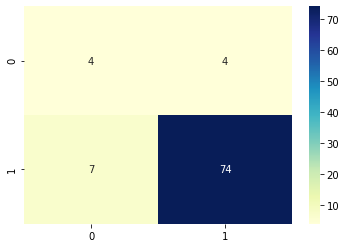

In [15]:
model=LogisticRegression()

model.fit(x_train, y_train)
print(model.score(X_test,Y_test))


mat=confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(mat,annot=True, fmt="d",cmap="YlGnBu")

In [16]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
Y_test=pd.DataFrame(Y_test)
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(Y_test,Y_test_pred[1])
    
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(Y_test,Y_test_pred[1]))


******** For i = 0.05 ******
Our testing accuracy is 0.9101123595505618
[[ 3  5]
 [ 3 78]]

******** For i = 0.1 ******
Our testing accuracy is 0.898876404494382
[[ 4  4]
 [ 5 76]]

******** For i = 0.15 ******
Our testing accuracy is 0.898876404494382
[[ 4  4]
 [ 5 76]]

******** For i = 0.2 ******
Our testing accuracy is 0.898876404494382
[[ 4  4]
 [ 5 76]]

******** For i = 0.25 ******
Our testing accuracy is 0.8876404494382022
[[ 4  4]
 [ 6 75]]

******** For i = 0.3 ******
Our testing accuracy is 0.8764044943820225
[[ 4  4]
 [ 7 74]]

******** For i = 0.35 ******
Our testing accuracy is 0.8764044943820225
[[ 4  4]
 [ 7 74]]

******** For i = 0.4 ******
Our testing accuracy is 0.8764044943820225
[[ 4  4]
 [ 7 74]]

******** For i = 0.45 ******
Our testing accuracy is 0.8764044943820225
[[ 4  4]
 [ 7 74]]

******** For i = 0.5 ******
Our testing accuracy is 0.8764044943820225
[[ 4  4]
 [ 7 74]]

******** For i = 0.55 ******
Our testing accuracy is 0.8651685393258427
[[ 4  4]
 [ 8 7

## arbre

0.8426966292134831


<AxesSubplot:>

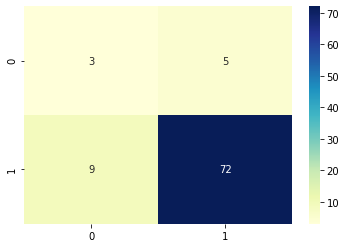

In [17]:
model=DecisionTreeClassifier()

model.fit(x_train, y_train)
print(model.score(X_test,Y_test))


mat=confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(mat,annot=True, fmt="d",cmap="YlGnBu")

In [18]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
Y_test=pd.DataFrame(Y_test)
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(Y_test,Y_test_pred[1])
    
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(Y_test,Y_test_pred[1]))


******** For i = 0.05 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.1 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.15 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.2 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.25 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.3 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.35 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.4 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.45 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.5 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 9 72]]

******** For i = 0.55 ******
Our testing accuracy is 0.8426966292134831
[[ 3  5]
 [ 

In [19]:
pred_proba_df

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
84,0.0,1.0
85,1.0,0.0
86,0.0,1.0
87,0.0,1.0


0.8876404494382022


<AxesSubplot:>

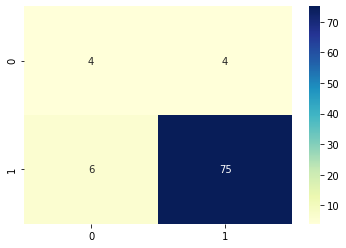

In [20]:
model=RandomForestClassifier()

model.fit(x_train, y_train)
print(model.score(X_test,Y_test))


mat=confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(mat,annot=True, fmt="d",cmap="YlGnBu")

In [21]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
Y_test=pd.DataFrame(Y_test)
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(Y_test,Y_test_pred[1])
    
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(Y_test,Y_test_pred[1]))


******** For i = 0.05 ******
Our testing accuracy is 0.9101123595505618
[[ 0  8]
 [ 0 81]]

******** For i = 0.1 ******
Our testing accuracy is 0.898876404494382
[[ 0  8]
 [ 1 80]]

******** For i = 0.15 ******
Our testing accuracy is 0.898876404494382
[[ 0  8]
 [ 1 80]]

******** For i = 0.2 ******
Our testing accuracy is 0.9213483146067416
[[ 3  5]
 [ 2 79]]

******** For i = 0.25 ******
Our testing accuracy is 0.9101123595505618
[[ 3  5]
 [ 3 78]]

******** For i = 0.3 ******
Our testing accuracy is 0.9101123595505618
[[ 3  5]
 [ 3 78]]

******** For i = 0.35 ******
Our testing accuracy is 0.898876404494382
[[ 3  5]
 [ 4 77]]

******** For i = 0.4 ******
Our testing accuracy is 0.898876404494382
[[ 3  5]
 [ 4 77]]

******** For i = 0.45 ******
Our testing accuracy is 0.898876404494382
[[ 4  4]
 [ 5 76]]

******** For i = 0.5 ******
Our testing accuracy is 0.8876404494382022
[[ 4  4]
 [ 6 75]]

******** For i = 0.55 ******
Our testing accuracy is 0.8651685393258427
[[ 4  4]
 [ 8 73]

In [22]:
pd.DataFrame(df_text_prop.sum(axis=0)).iloc[1:,:].sort_values(by=[0]).tail(20)

,0
2723D092B63885E0D7C260CC007E8B9D_0.0,421
285B2674FFB211E8AA9BFA163EAD7035_nan,421
8F121CE07D74717E0B1F21D122E04521_nan,427
C55016D214EA11E9B4A4FA163E3BC92C_nan,432
C550560A14EA11E9B4A4FA163E3BC92C_nan,432
C5816E7414EA11E9B4A4FA163E3BC92C_nan,432
C54F215714EA11E9B4A4FA163E3BC92C_nan,432
C54FCF0D14EA11E9B4A4FA163E3BC92C_nan,432
C541BBF314EA11E9B4A4FA163E3BC92C_nan,432
AFD3E93B307E11EA8057FA163E989830_nan,432
